In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

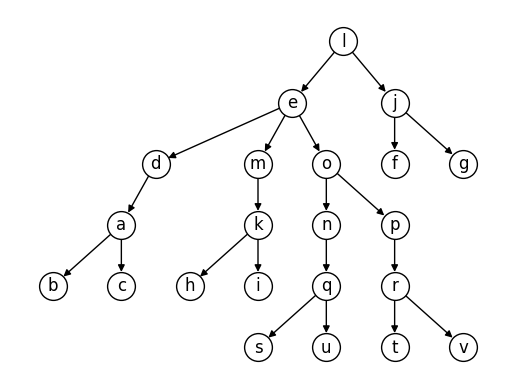

In [27]:
G = nx.DiGraph()

# G.add_node(0)
# arr_edges = [[0, 1], [1,  2], [0,  5], [0,  6], [2, 3], [2, 4], [6, 7], [7, 10], [6, 8],
#              [6, 9], [9, 11], [9, 12]]

# arr_edges = [["m", "e"], ["m", "k"], ["e", "d"], ["e", "l"], ["e", "o"], 
#              ["k", "h"], ["k", "i"], ["d", "a"], ["a", "b"], ["a", "c"],
#              ["l", "j"], ["j", "f"], ["j", "g"], ["o", "n"], ["o", "p"],
#              ["n", "q"], ["q", "s"], ["q", "u"], ["p", "r"],
#              ["r", "t"], ["r", "v"]]

arr_edges = [ ["e", "d"], ["e", "m"], ["e", "o"], 
              ["l", "e"], ["l", "j"], ["m", "k"],
              ["k", "h"], ["k", "i"], ["d", "a"], ["a", "b"], ["a", "c"],
              ["j", "f"], ["j", "g"], ["o", "n"], ["o", "p"],
             ["n", "q"], ["q", "s"], ["q", "u"], ["p", "r"],
             ["r", "t"], ["r", "v"]]

for edge in arr_edges:
  G.add_nodes_from(edge)
  G.add_edge(*edge)

fig, ax = plt.subplots()

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot',
  args="-Grankdir=TB")
nx.draw(G, ax=ax, with_labels=True, node_size=400, node_color="w", edgecolors="k",
        pos=pos)

plt.show(fig)

In [4]:
leaf_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]
leaf_nodes

[5, 3, 4, 10, 8, 11, 12]

Huffman encoding

**procedure** _Huffman($C$: symbols $a_i$ with frequencies $w_i$, $i=1, \ldots, n$)      
$F := $ forest of $n$ rooted trees, each consisting of the single vertex $a_i$ and assigned weight $w_i$    
**while** $F$ is not a tree:    
  &nbsp;&nbsp;&nbsp;&nbsp;
  Replace the rooted trees $T$ and $T'$ of least weights from $F$ with $w(T) \geq w(T')$     
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    with a tree having a new root that has $T$ as its left subtree and $T'$ as its right subtree.    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Label the new edge to $T$ with $0$ and the new edge to $T'$ with 1.    
  &nbsp;&nbsp;&nbsp;&nbsp;
  Assign $w(T) + w(T)'$ as the weight of the new tree.    
  &nbsp;&nbsp;&nbsp;&nbsp;
  **return** \{the Huffman coding for the symbol $a_i$ is the concatenation of the labels     
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    of the edges in the unique path from the root to the vertex $a_i$\} 

In [39]:
# -- initial forest
# labels = ["A", "B", "C", "D", "E", "F"]
# weights = [0.08, 0.10, 0.12, 0.15, 0.20, 0.35]

# labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J",
#           "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
#           "U", "V", "W", "X", "Y", "Z"]
# weights = [0.0817, 0.0145, 0.0248, 0.0431, 0.1232, 0.0209, 0.0182, 0.0668, 0.0689, 0.0010,
#            0.0080, 0.0397, 0.0277, 0.0662, 0.0781, 0.0156, 0.0009, 0.0572, 0.0628, 0.0905,
#            0.0304, 0.0102, 0.0264, 0.0015, 0.0211, 0.0005]

# labels = ["p", "q", "r", "s", "t"]
# weights = [0.20, 0.10, 0.15, 0.25, 0.30]

labels = ["h", "i", "j", "k", "l", "m", "n"]
weights = [0.10, 0.25, 0.05, 0.15, 0.30, 0.07, 0.08]
  
unsorted_weights = weights.copy()
unsorted_labels = labels.copy()
idx_sort = np.argsort(unsorted_weights)
weights = [unsorted_weights[idx] for idx in idx_sort]
labels =[unsorted_labels[idx] for idx in idx_sort]

history_labels = {0: labels}
history_weights = {0: weights}


step = 0
while True:
  # print(f"step = {step + 1}")
  unsort_weights = weights[2:] + [sum(weights[:2][::-1])] 
  unsort_labels =  labels[2:] + ["("+" ".join(labels[:2][::-1])+")"]
  # print(unsort_weights)
  # print(unsort_labels)
  idx_sort = np.argsort(unsort_weights)
  weights = [unsort_weights[idx] for idx in idx_sort]
  labels =[unsort_labels[idx] for idx in idx_sort]
  # print(weights)
  # print(labels)
  history_labels[step+1] = labels
  history_weights[step+1] = weights
  
  if len(weights) == 1:
    break
  step += 1


In [40]:
for k, v in history_labels.items():
  print(f"{k:2d}", v)

print("\n\n")
for k, v in history_weights.items():
  print(f"{k:2d}", v)

 0 ['j', 'm', 'n', 'h', 'k', 'i', 'l']
 1 ['n', 'h', '(m j)', 'k', 'i', 'l']
 2 ['(m j)', 'k', '(h n)', 'i', 'l']
 3 ['(h n)', 'i', '(k (m j))', 'l']
 4 ['(k (m j))', 'l', '(i (h n))']
 5 ['(i (h n))', '(l (k (m j)))']
 6 ['((l (k (m j))) (i (h n)))']



 0 [0.05, 0.07, 0.08, 0.1, 0.15, 0.25, 0.3]
 1 [0.08, 0.1, 0.12000000000000001, 0.15, 0.25, 0.3]
 2 [0.12000000000000001, 0.15, 0.18, 0.25, 0.3]
 3 [0.18, 0.25, 0.27, 0.3]
 4 [0.27, 0.3, 0.43]
 5 [0.43, 0.5700000000000001]
 6 [1.0]


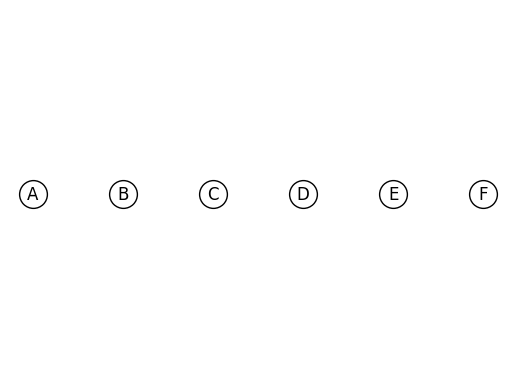

In [17]:
fig, ax = plt.subplots()
G = nx.Graph()

for node in history_steps[0]:
  G.add_node(node)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot',
  args="-Grankdir=TB")
nx.draw(G, ax=ax, with_labels=True, node_size=400, node_color="w", edgecolors="k",
        pos=pos)

plt.show(fig)